## 1. Dependencies

In [1]:
import importlib
import math
import matplotlib.pyplot as plt
import mlflow
import mlflow.sklearn
import numpy as np
import os
import pandas as pd
import seaborn as sns
import sys
import tempfile

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from pathlib import Path

# add the src directory to the path to import custom modules
sys.path.append('../src')

import data_utils
from data_utils import load_all_csvs_from_folder, time_to_minutes

importlib.reload(data_utils)

print("Libraries imported successfully!")

Libraries imported successfully!


In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)

## 2. Load Datasets & First Exploration

The dataset used in this project was obtained by following the web scraping tutorial published here:
🔗 https://www.kaggle.com/code/jgug05/hyrox-data-scraping/notebook

All data was collected for educational purposes and is publicly available through the official Hyrox results website.

In [3]:
# load all CSV files from the raw data folder
data_folder = '../data/raw'
print("="*70)
print(f"Loading all CSV files from: {data_folder}")
print("="*70)

# load all CSV files into a single raw DataFrame
df = load_all_csvs_from_folder(data_folder)

print(f"\nSuccessfully loaded {len(df)} total records!")
print(f"Data shape: {df.shape}")
print(f"Number of unique source files: {df['source_file'].nunique()}")


Loading all CSV files from: ../data/raw
Loading S6 2023 München.csv
Loading S7 2024 Toronto.csv
Loading S7 2025 Paris.csv
Loading S6 2024 Sports Direct HYROX London.csv
Loading S5 2022 Basel.csv
Loading S6 2023 Warschau.csv
Loading S6 2023 Paris.csv
Loading S4 2021 Dallas.csv
Loading S4 2022 Chicago.csv
Loading S7 2024 Cape Town.csv
Loading S5 2022 Valencia.csv
Loading S5 2023 Anaheim.csv
Loading S7 2025 Las Vegas.csv
Loading S7 2024 Stuttgart.csv
Loading S7 2025 Belgium.csv
Loading S4 2022 London.csv
Loading S5 2023 Chicago - North American Open Championship.csv
Loading S4 2022 Los Angeles.csv
Loading S7 2025 Taipei.csv
Loading S7 2025 Monterrey.csv
Loading S7 2025 Warsaw.csv
Loading S4 2021 New York.csv
Loading S5 2023 Dallas.csv
Loading S7 2024 Singapore.csv
Loading S4 2021 Madrid.csv
Loading S7 2024 Hamburg.csv
Loading S6 2024 Doha.csv
Loading S5 2022 Berlin.csv
Loading S7 2024 Milan.csv
Loading S6 2023 Chicago.csv
Loading S7 2025 Miami Beach.csv
Loading S5 2023 Bilbao.csv
Loading

In [4]:
# check the shape of the dataset
print(f"Dataset shape: {df.shape}")

Dataset shape: (167761, 37)


In [5]:
# show basic dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167761 entries, 0 to 167760
Data columns (total 37 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   event_id      167761 non-null  object
 1   event_name    167761 non-null  object
 2   id            167761 non-null  object
 3   name          167743 non-null  object
 4   gender        167761 non-null  object
 5   nationality   165774 non-null  object
 6   age_group     167656 non-null  object
 7   division      167761 non-null  object
 8   total_time    167761 non-null  object
 9   work_time     167761 non-null  object
 10  roxzone_time  167761 non-null  object
 11  run_time      167761 non-null  object
 12  run_1         167761 non-null  object
 13  work_1        167761 non-null  object
 14  roxzone_1     167761 non-null  object
 15  run_2         167761 non-null  object
 16  work_2        167761 non-null  object
 17  roxzone_2     167761 non-null  object
 18  run_3         167761 non

In [11]:
print("FIRST 100 ROWS OF DATA")
display(df.head())

print("\nLAST 5 ROWS OF DATA")
display(df.tail())

FIRST 100 ROWS OF DATA


,event_id,event_name,id,name,gender,nationality,age_group,division,total_time,work_time,roxzone_time,run_time,run_1,work_1,roxzone_1,run_2,work_2,roxzone_2,run_3,work_3,roxzone_3,run_4,work_4,roxzone_4,run_5,work_5,roxzone_5,run_6,work_6,roxzone_6,run_7,work_7,roxzone_7,run_8,work_8,roxzone_8,source_file
0,JGDMS4JI5C9,S6 2023 München,111008,"Diensthuber, Josef",male,GER,40-44,open,0:59:07,0:25:31,0:03:26,0:30:10,0:03:12,0:04:06,0:00:02,0:03:36,0:02:07,0:00:27,0:03:56,0:03:20,0:00:35,0:03:51,0:03:18,0:00:39,0:03:48,0:04:13,0:00:28,0:03:50,0:01:15,0:00:40,0:03:47,0:03:05,0:00:35,0:04:10,0:04:07,0:00:00,S6 2023 München.csv
1,JGDMS4JI5C9,S6 2023 München,112005,"Groinig, Rene",male,AUT,25-29,open,0:59:27,0:25:06,0:02:57,0:31:24,0:03:15,0:03:59,0:00:02,0:03:38,0:02:13,0:00:23,0:03:54,0:03:15,0:00:31,0:04:00,0:02:39,0:00:36,0:04:02,0:04:03,0:00:19,0:03:54,0:01:21,0:00:36,0:03:59,0:03:24,0:00:30,0:04:42,0:04:12,0:00:00,S6 2023 München.csv
2,JGDMS4JI5C9,S6 2023 München,123024,"Stejskal, Tomáš",male,CZE,30-34,open,1:00:22,0:26:04,0:03:13,0:31:05,0:03:31,0:04:14,0:00:03,0:03:48,0:01:52,0:00:24,0:03:53,0:03:15,0:00:32,0:03:52,0:03:00,0:00:40,0:03:53,0:04:19,0:00:20,0:03:53,0:01:31,0:00:39,0:03:55,0:03:16,0:00:35,0:04:20,0:04:37,0:00:00,S6 2023 München.csv
3,JGDMS4JI5C9,S6 2023 München,115015,"Oldach, Maik",male,GER,30-34,open,1:03:13,0:27:29,0:03:14,0:32:30,0:03:28,0:04:05,0:00:01,0:03:52,0:02:22,0:00:26,0:04:03,0:03:09,0:00:32,0:04:04,0:03:47,0:00:36,0:04:06,0:04:10,0:00:23,0:04:07,0:01:42,0:00:43,0:04:11,0:03:37,0:00:33,0:04:39,0:04:37,0:00:00,S6 2023 München.csv
4,JGDMS4JI5C9,S6 2023 München,104030,"Scheffel, Steve",male,GER,30-34,open,1:04:00,0:29:01,0:03:22,0:31:37,0:03:22,0:04:13,0:00:02,0:03:47,0:02:42,0:00:25,0:04:08,0:03:32,0:00:36,0:03:58,0:02:30,0:00:39,0:04:04,0:04:35,0:00:23,0:03:57,0:02:00,0:00:45,0:03:57,0:03:54,0:00:32,0:04:24,0:05:35,0:00:00,S6 2023 München.csv



LAST 5 ROWS OF DATA


,event_id,event_name,id,name,gender,nationality,age_group,division,total_time,work_time,roxzone_time,run_time,run_1,work_1,roxzone_1,run_2,work_2,roxzone_2,run_3,work_3,roxzone_3,run_4,work_4,roxzone_4,run_5,work_5,roxzone_5,run_6,work_6,roxzone_6,run_7,work_7,roxzone_7,run_8,work_8,roxzone_8,source_file
167756,2EFMS4JI283,S4 2021 Stuttgart,123029,"König, Mirjana",female,GER,45-49,open,1:48:04,0:39:09,0:09:23,0:59:32,0:06:02,0:05:28,0:00:29,0:07:09,0:02:35,0:01:46,0:07:23,0:04:40,0:01:11,0:07:21,0:09:03,0:01:50,0:07:30,0:05:50,0:01:10,0:07:31,0:02:01,0:01:19,0:07:49,0:05:34,0:01:38,0:08:47,0:03:58,0:00:00,S4 2021 Stuttgart.csv
167757,2EFMS4JI283,S4 2021 Stuttgart,123001,"Velkovski, Paula",female,GER,45-49,open,1:52:13,0:46:58,0:09:47,0:55:28,0:06:19,0:05:50,0:00:20,0:06:41,0:03:26,0:01:20,0:06:54,0:06:58,0:01:40,0:06:56,0:09:24,0:01:54,0:06:54,0:06:36,0:01:17,0:06:52,0:02:17,0:01:31,0:06:55,0:07:11,0:01:45,0:07:57,0:05:16,0:00:00,S4 2021 Stuttgart.csv
167758,2EFMS4JI283,S4 2021 Stuttgart,130001,"Kuhlmann, Annika",female,GER,40-44,open,1:54:30,0:43:25,0:13:33,0:57:32,0:06:01,0:05:33,0:00:34,0:06:29,0:02:57,0:02:21,0:07:43,0:07:35,0:01:54,0:07:36,0:07:37,0:02:39,0:07:24,0:05:31,0:02:02,0:06:48,0:02:35,0:01:33,0:07:05,0:06:14,0:02:30,0:08:26,0:05:23,0:00:00,S4 2021 Stuttgart.csv
167759,2EFMS4JI283,S4 2021 Stuttgart,125001,"Grimmler, Bianka",female,GER,40-44,open,1:57:14,0:48:56,0:11:25,0:56:53,0:05:55,0:05:42,0:00:17,0:06:26,0:03:26,0:01:29,0:06:36,0:06:20,0:01:07,0:06:51,0:10:24,0:02:30,0:06:55,0:06:01,0:01:19,0:06:56,0:02:19,0:01:37,0:07:24,0:07:32,0:03:06,0:09:50,0:07:12,0:00:00,S4 2021 Stuttgart.csv
167760,2EFMS4JI283,S4 2021 Stuttgart,124015,"Kinkopf, Heike",female,GER,50-54,open,2:10:55,0:52:53,0:10:24,1:07:38,0:07:16,0:05:43,0:00:32,0:07:33,0:02:29,0:01:31,0:07:46,0:06:14,0:01:23,0:07:59,0:12:35,0:02:23,0:09:21,0:05:41,0:01:22,0:08:22,0:02:16,0:01:27,0:08:30,0:10:52,0:01:46,0:10:51,0:07:03,0:00:00,S4 2021 Stuttgart.csv


In [12]:
# check for missing values
print("MISSING VALUES ANALYSIS")
print("="*47)
missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df)) * 100

missing_df = pd.DataFrame({
    'Column': missing_values.index,
    'Missing Count': missing_values.values,
    'Missing Percentage': missing_percent.values
})

# only show columns with missing values
missing_df = missing_df[missing_df['Missing Count'] > 0].sort_values('Missing Count', ascending=False)

if len(missing_df) > 0:
    display(missing_df)
else:
    print("No missing values found in the dataset!")


MISSING VALUES ANALYSIS


,Column,Missing Count,Missing Percentage
5,nationality,1975,1.177396
6,age_group,105,0.062596


In [13]:
# analyze source files
print("SOURCE FILES ANALYSIS")
print("="*70)
source_counts = df['source_file'].value_counts()
print(f"Total number of source files: {len(source_counts)}")
print(f"Records per file - Min: {source_counts.min()}, Max: {source_counts.max()}, Mean: {source_counts.mean():.1f}")

print("\nTop 10 files by record count:")
display(source_counts.head(10))

print("\nBottom 10 files by record count:")
display(source_counts.tail(10))


SOURCE FILES ANALYSIS
Total number of source files: 172
Records per file - Min: 30, Max: 4133, Mean: 975.2

Top 10 files by record count:


S7 2024 Birmingham.csv                    4133
S7 2024 London.csv                        3853
S6 2024 Sports Direct HYROX London.csv    3148
S7 2025 Paris.csv                         2841
S6 2023 London.csv                        2802
S7 2024 Dublin.csv                        2638
S6 2024 Glasgow.csv                       2590
S7 2025 Cologne.csv                       2584
S7 2025 Toulouse.csv                      2499
S7 2024 Melbourne.csv                     2394
Name: source_file, dtype: int64


Bottom 10 files by record count:


S4 2021 Dallas.csv                            192
S4 2021 Berlin.csv                            190
S4 2022 Los Angeles.csv                       178
S4 2022 Chicago.csv                           161
S4 2021 Leipzig.csv                           149
S5 2023 Miami.csv                             122
S4 2021 Los Angeles.csv                        95
S6 2024 World Championships Nice.csv           75
S6 2024 Doha All Women's Race.csv              72
S5 2023 World Championships Manchester.csv     30
Name: source_file, dtype: int64

In [14]:
# analyze statistics for numeric columns
print("NUMERIC COLUMNS SUMMARY STATISTICS")
print("="*50)

numeric_cols = df.select_dtypes(include=[np.number]).columns

if len(numeric_cols) > 0:
    print(f"Number of numeric columns: {len(numeric_cols)}")
    display(df[numeric_cols].describe())
else:
    print("No numeric columns in the dataset!")


NUMERIC COLUMNS SUMMARY STATISTICS
No numeric columns in the dataset!


## 3. Preprocessing

In [15]:
# create a clean copy of the DataFrame for preprocessing
clean_df = df.copy()

### 3.1 Create User Identification

In [16]:
clean_df['id'].duplicated().any()

True

In [17]:
clean_df['id'].isna().any()

False

Checking the data I noticed thay the same `id` value can be found for for different users in different races, so I will start identifying users by `id + name + nationality`

In [18]:
clean_df.insert(
    0, 
    'user_id', 
    clean_df['id'].astype(str) + '_' + clean_df['name'].fillna('UNKNOWN') + '_' + clean_df['nationality'].fillna('UNKNOWN')
)

In [19]:
# rename the work columns to more descriptive names
clean_df.rename(columns={
    'work_1': '1000m Ski',
    'work_2': '50m Sled Push',
    'work_3': '50m Sled Pull',
    'work_4': '80m Burpee Broad Jump',
    'work_5': '1000m Row',
    'work_6': '200m Farmer Carry',
    'work_7': '100m Sandbag Lunges',
    'work_8': '100 Wall Balls'
}, inplace=True)

In [20]:
clean_df.head(2)

,user_id,event_id,event_name,id,name,gender,nationality,age_group,division,total_time,work_time,roxzone_time,run_time,run_1,1000m Ski,roxzone_1,run_2,50m Sled Push,roxzone_2,run_3,50m Sled Pull,roxzone_3,run_4,80m Burpee Broad Jump,roxzone_4,run_5,1000m Row,roxzone_5,run_6,200m Farmer Carry,roxzone_6,run_7,100m Sandbag Lunges,roxzone_7,run_8,100 Wall Balls,roxzone_8,source_file
0,"111008_Diensthuber, Josef_GER",JGDMS4JI5C9,S6 2023 München,111008,"Diensthuber, Josef",male,GER,40-44,open,0:59:07,0:25:31,0:03:26,0:30:10,0:03:12,0:04:06,0:00:02,0:03:36,0:02:07,0:00:27,0:03:56,0:03:20,0:00:35,0:03:51,0:03:18,0:00:39,0:03:48,0:04:13,0:00:28,0:03:50,0:01:15,0:00:40,0:03:47,0:03:05,0:00:35,0:04:10,0:04:07,0:00:00,S6 2023 München.csv
1,"112005_Groinig, Rene_AUT",JGDMS4JI5C9,S6 2023 München,112005,"Groinig, Rene",male,AUT,25-29,open,0:59:27,0:25:06,0:02:57,0:31:24,0:03:15,0:03:59,0:00:02,0:03:38,0:02:13,0:00:23,0:03:54,0:03:15,0:00:31,0:04:00,0:02:39,0:00:36,0:04:02,0:04:03,0:00:19,0:03:54,0:01:21,0:00:36,0:03:59,0:03:24,0:00:30,0:04:42,0:04:12,0:00:00,S6 2023 München.csv


### 3.2 Gender encoding as binary

In [21]:
print(f"Unique genders: {clean_df['gender'].unique()}")

Unique genders: ['male' 'female']


In [22]:
clean_df['gender'].head(5)

0    male
1    male
2    male
3    male
4    male
Name: gender, dtype: object

In [23]:
# apply binary encoding
clean_df['gender'] = clean_df['gender'].map({'male': 0, 'female': 1})

In [24]:
clean_df['gender'].head(5)

0    0
1    0
2    0
3    0
4    0
Name: gender, dtype: int64

### 3.3 Convert station times to format in minutes

In [25]:
clean_df.head(2)

,user_id,event_id,event_name,id,name,gender,nationality,age_group,division,total_time,work_time,roxzone_time,run_time,run_1,1000m Ski,roxzone_1,run_2,50m Sled Push,roxzone_2,run_3,50m Sled Pull,roxzone_3,run_4,80m Burpee Broad Jump,roxzone_4,run_5,1000m Row,roxzone_5,run_6,200m Farmer Carry,roxzone_6,run_7,100m Sandbag Lunges,roxzone_7,run_8,100 Wall Balls,roxzone_8,source_file
0,"111008_Diensthuber, Josef_GER",JGDMS4JI5C9,S6 2023 München,111008,"Diensthuber, Josef",0,GER,40-44,open,0:59:07,0:25:31,0:03:26,0:30:10,0:03:12,0:04:06,0:00:02,0:03:36,0:02:07,0:00:27,0:03:56,0:03:20,0:00:35,0:03:51,0:03:18,0:00:39,0:03:48,0:04:13,0:00:28,0:03:50,0:01:15,0:00:40,0:03:47,0:03:05,0:00:35,0:04:10,0:04:07,0:00:00,S6 2023 München.csv
1,"112005_Groinig, Rene_AUT",JGDMS4JI5C9,S6 2023 München,112005,"Groinig, Rene",0,AUT,25-29,open,0:59:27,0:25:06,0:02:57,0:31:24,0:03:15,0:03:59,0:00:02,0:03:38,0:02:13,0:00:23,0:03:54,0:03:15,0:00:31,0:04:00,0:02:39,0:00:36,0:04:02,0:04:03,0:00:19,0:03:54,0:01:21,0:00:36,0:03:59,0:03:24,0:00:30,0:04:42,0:04:12,0:00:00,S6 2023 München.csv


In [26]:
# check the unique values in the 'roxzone_8' to verify if it has times
clean_df['roxzone_8'].unique()

array(['0:00:00'], dtype=object)

In [27]:
clean_df.drop(columns=['roxzone_8'], inplace=True)

In [28]:
# check the indexes for the time columns
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 167743 entries, 0 to 167760
Data columns (total 37 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   user_id                167743 non-null  object
 1   event_id               167743 non-null  object
 2   event_name             167743 non-null  object
 3   id                     167743 non-null  object
 4   name                   167743 non-null  object
 5   gender                 167743 non-null  int64 
 6   nationality            165768 non-null  object
 7   age_group              167638 non-null  object
 8   division               167743 non-null  object
 9   total_time             167743 non-null  object
 10  work_time              167743 non-null  object
 11  roxzone_time           167743 non-null  object
 12  run_time               167743 non-null  object
 13  run_1                  167743 non-null  object
 14  1000m Ski              167743 non-null  object
 15  

In [29]:
min_index = 9
max_index = 36
time_column_names = clean_df.columns[min_index:max_index]
print(f"Time columns: {time_column_names.tolist()}")

Time columns: ['total_time', 'work_time', 'roxzone_time', 'run_time', 'run_1', '1000m Ski', 'roxzone_1', 'run_2', '50m Sled Push', 'roxzone_2', 'run_3', '50m Sled Pull', 'roxzone_3', 'run_4', '80m Burpee Broad Jump', 'roxzone_4', 'run_5', '1000m Row', 'roxzone_5', 'run_6', '200m Farmer Carry', 'roxzone_6', 'run_7', '100m Sandbag Lunges', 'roxzone_7', 'run_8', '100 Wall Balls']


In [30]:
# convert time columns to minutes
for col in time_column_names:
    clean_df[col] = clean_df[col].apply(time_to_minutes)

In [31]:
clean_df.iloc[:, min_index:max_index].head(2)

,total_time,work_time,roxzone_time,run_time,run_1,1000m Ski,roxzone_1,run_2,50m Sled Push,roxzone_2,run_3,50m Sled Pull,roxzone_3,run_4,80m Burpee Broad Jump,roxzone_4,run_5,1000m Row,roxzone_5,run_6,200m Farmer Carry,roxzone_6,run_7,100m Sandbag Lunges,roxzone_7,run_8,100 Wall Balls
0,59.116667,25.516667,3.433333,30.166667,3.20,4.100000,0.033333,3.600000,2.116667,0.450000,3.933333,3.333333,0.583333,3.85,3.30,0.65,3.800000,4.216667,0.466667,3.833333,1.25,0.666667,3.783333,3.083333,0.583333,4.166667,4.116667
1,59.450000,25.100000,2.950000,31.400000,3.25,3.983333,0.033333,3.633333,2.216667,0.383333,3.900000,3.250000,0.516667,4.00,2.65,0.60,4.033333,4.050000,0.316667,3.900000,1.35,0.600000,3.983333,3.400000,0.500000,4.700000,4.200000


### 3.4 Age Groups

In [32]:
print("="*70)
print("Distinct age groups for male:")
print(clean_df[clean_df['gender'] == 0]['age_group'].unique())
print("\nDistinct age groups for female:")
print(clean_df[clean_df['gender'] == 1]['age_group'].unique())

Distinct age groups for male:
['40-44' '25-29' '30-34' '35-39' '16-24' '45-49' '55-59' '50-54' '60-64'
 '65-69' nan '70-74' '75-79' '80-84']

Distinct age groups for female:
['16-24' '25-29' '45-49' '55-59' '30-34' '35-39' '40-44' '60-64' '50-54'
 '65-69' nan '70-74' '75-79']


In [33]:
# number of participants without age group
print("="*70)
missing_age_group_participants = clean_df["age_group"].isna()
print(f"Number of participants without age group: {missing_age_group_participants.sum()}")

Number of participants without age group: 105


> **Note:**
> 
> I'm not removing `missing_age_group_participants`, as their race data may still be important for comparing their past performances across events.
>
> However, these users will be excluded from any ML training or clustering tasks where age_group is required as input.

In [34]:
# split age_group based on the '-' character
split_ages = clean_df['age_group'].str.split('-', expand=True)

# split age_group into age_min and age_max
age_min = pd.to_numeric(split_ages[0], errors='coerce')
age_max = pd.to_numeric(split_ages[1], errors='coerce')

In [35]:
clean_df.insert(9, 'age_min', age_min)
clean_df.insert(10, 'age_max', age_max)

In [36]:
clean_df.head(2)

,user_id,event_id,event_name,id,name,gender,nationality,age_group,division,age_min,age_max,total_time,work_time,roxzone_time,run_time,run_1,1000m Ski,roxzone_1,run_2,50m Sled Push,roxzone_2,run_3,50m Sled Pull,roxzone_3,run_4,80m Burpee Broad Jump,roxzone_4,run_5,1000m Row,roxzone_5,run_6,200m Farmer Carry,roxzone_6,run_7,100m Sandbag Lunges,roxzone_7,run_8,100 Wall Balls,source_file
0,"111008_Diensthuber, Josef_GER",JGDMS4JI5C9,S6 2023 München,111008,"Diensthuber, Josef",0,GER,40-44,open,40.0,44.0,59.116667,25.516667,3.433333,30.166667,3.20,4.100000,0.033333,3.600000,2.116667,0.450000,3.933333,3.333333,0.583333,3.85,3.30,0.65,3.800000,4.216667,0.466667,3.833333,1.25,0.666667,3.783333,3.083333,0.583333,4.166667,4.116667,S6 2023 München.csv
1,"112005_Groinig, Rene_AUT",JGDMS4JI5C9,S6 2023 München,112005,"Groinig, Rene",0,AUT,25-29,open,25.0,29.0,59.450000,25.100000,2.950000,31.400000,3.25,3.983333,0.033333,3.633333,2.216667,0.383333,3.900000,3.250000,0.516667,4.00,2.65,0.60,4.033333,4.050000,0.316667,3.900000,1.35,0.600000,3.983333,3.400000,0.500000,4.700000,4.200000,S6 2023 München.csv


### 3.5 Analyze Stations

In [37]:
stations = time_column_names

In [38]:
# explore basic statistics for the time (in secs) each participant spent at each station
clean_df[stations].describe()

,total_time,work_time,roxzone_time,run_time,run_1,1000m Ski,roxzone_1,run_2,50m Sled Push,roxzone_2,run_3,50m Sled Pull,roxzone_3,run_4,80m Burpee Broad Jump,roxzone_4,run_5,1000m Row,roxzone_5,run_6,200m Farmer Carry,roxzone_6,run_7,100m Sandbag Lunges,roxzone_7,run_8,100 Wall Balls
count,167743.000000,167743.000000,167743.000000,167743.000000,167743.000000,167743.000000,167743.000000,167743.000000,167743.000000,167743.000000,167743.000000,167743.000000,167743.000000,167743.000000,167743.000000,167743.000000,167743.000000,167743.000000,167743.000000,167743.000000,167743.000000,167743.000000,167743.000000,167743.000000,167743.000000,167743.000000,167743.000000
mean,86.046271,36.230501,7.114618,42.701152,4.608924,4.426224,0.679952,4.953907,2.806088,0.927334,5.342632,5.132336,0.956293,5.348088,5.708262,0.995047,5.544825,4.767357,0.954365,5.399559,2.148249,1.235335,5.390352,5.063450,1.366291,6.112865,6.178534
std,28.169420,12.334291,3.178437,14.168024,1.703020,1.247881,0.394486,1.675795,1.166047,0.521060,1.838747,2.106668,0.524924,1.828273,2.636961,0.755684,1.955395,1.354904,0.529050,1.864958,0.812066,0.642668,1.877628,2.166220,0.844685,2.523812,2.929249
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,77.333333,32.000000,5.450000,38.333333,3.883333,4.283333,0.450000,4.450000,2.300000,0.650000,4.766667,4.166667,0.683333,4.766667,4.366667,0.583333,4.900000,4.600000,0.683333,4.800000,1.833333,0.916667,4.783333,4.116667,0.950000,5.116667,4.683333
50%,87.466667,36.550000,6.900000,43.383333,4.700000,4.600000,0.716667,5.016667,2.766667,0.883333,5.400000,5.050000,0.916667,5.416667,5.533333,0.900000,5.583333,4.950000,0.916667,5.450000,2.133333,1.200000,5.433333,4.933333,1.266667,6.000000,5.916667
75%,99.600000,42.150000,8.733333,49.266667,5.550000,5.000000,0.900000,5.683333,3.316667,1.166667,6.133333,6.133333,1.200000,6.166667,6.950000,1.266667,6.383333,5.366667,1.200000,6.216667,2.533333,1.533333,6.216667,5.983333,1.700000,7.116667,7.500000
max,256.350000,131.766667,66.066667,148.650000,47.516667,11.183333,26.616667,43.500000,53.516667,18.266667,38.366667,57.750000,28.816667,31.833333,44.733333,31.216667,43.116667,15.300000,30.033333,34.250000,30.200000,26.750000,44.366667,54.816667,56.766667,58.650000,56.016667


##### Histogram Plots & Outliers

In [40]:
# setup MLflow tracking
mlflow.end_run()
mlflow.set_experiment("hyrox-participant-clustering")
mlflow.set_tracking_uri("http://127.0.0.1:8080")

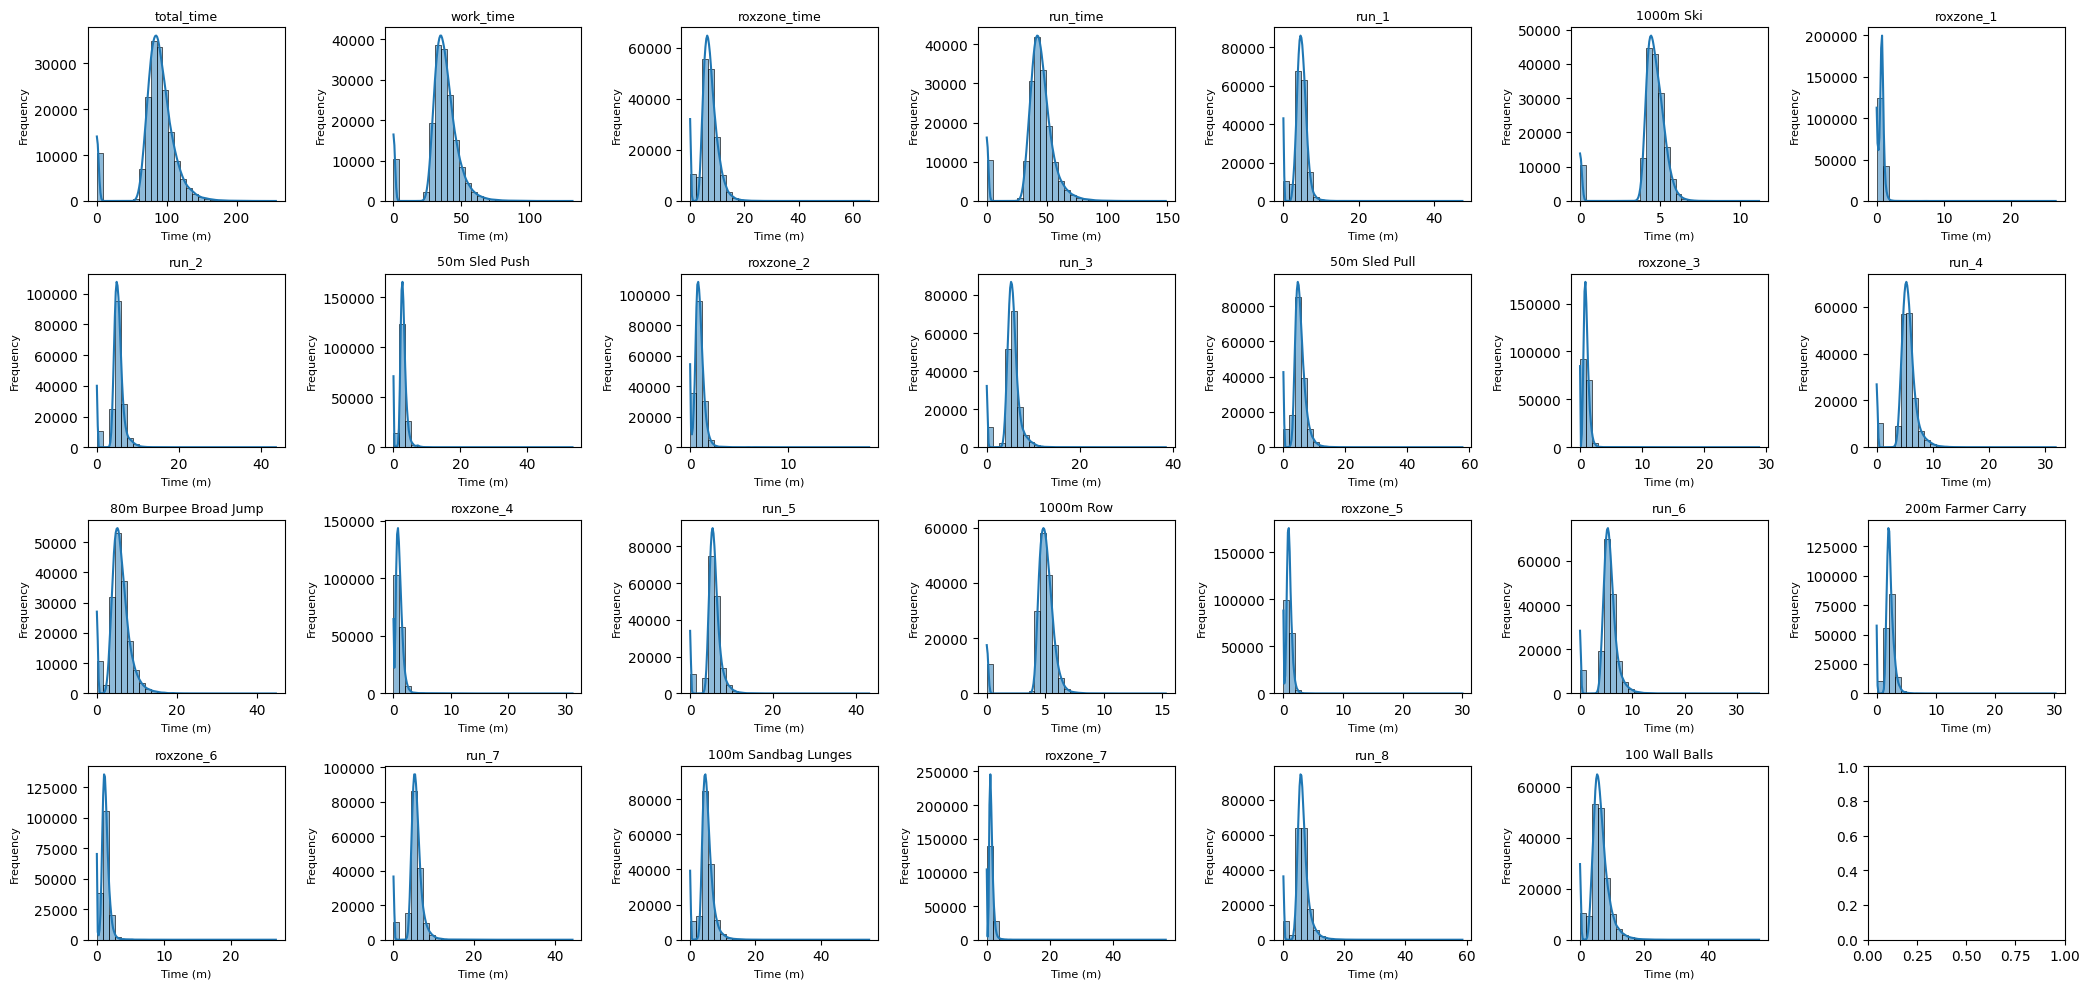

🏃 View run histogram_charts at: http://127.0.0.1:8080/#/experiments/809278682180774593/runs/eb3150ecbf04449ab8654915c57c867b
🧪 View experiment at: http://127.0.0.1:8080/#/experiments/809278682180774593


In [41]:
with mlflow.start_run(run_name="histogram_charts"):

    # plots setup
    num_cols = 7
    num_plots = len(stations)
    num_rows = math.ceil(num_plots / num_cols)

    # subplots
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(num_cols * 3, num_rows * 2.5))
    axes = axes.flatten()

    for i, col in enumerate(stations):
        sns.histplot(clean_df[col], kde=True, bins=30, ax=axes[i])
        axes[i].set_title(col, fontsize=9)
        axes[i].set_xlabel('Time (m)', fontsize=8)
        axes[i].set_ylabel('Frequency', fontsize=8)
        mlflow.log_metric(f"{col}_mean", clean_df[col].mean())
        mlflow.log_metric(f"{col}_std", clean_df[col].std())
        mlflow.log_metric(f"{col}_min", clean_df[col].min())
        mlflow.log_metric(f"{col}_max", clean_df[col].max())
        mlflow.log_metric(f"{col}_median", clean_df[col].median())
        mlflow.log_metric(f"{col}_iqr", clean_df[col].quantile(0.75) - clean_df[col].quantile(0.25))

    with tempfile.NamedTemporaryFile(suffix=".png", delete=False) as tmp:
        plt.savefig(tmp.name)
        tmp.close()
        mlflow.log_artifact(tmp.name, artifact_path="figures")

    plt.tight_layout()
    plt.show()
    plt.close()

mlflow.end_run()

In [42]:
# outliers detection per station
print("TOTAL NUM. OUTLIER THAT CAN INFLUENCE THE AVERAGE TIME SPENT PER STATION")
print("="*72)
outlier_thresholds = clean_df[stations].mean() + 3 * clean_df[stations].std()
outliers = (clean_df[stations] > outlier_thresholds).sum().sort_values(ascending=False)
print(outliers)

TOTAL NUM. OUTLIER THAT CAN INFLUENCE THE AVERAGE TIME SPENT PER STATION
100 Wall Balls           1762
50m Sled Push            1746
80m Burpee Broad Jump    1646
run_8                    1621
100m Sandbag Lunges      1602
roxzone_4                1602
roxzone_7                1565
roxzone_6                1422
50m Sled Pull            1247
roxzone_time             1222
roxzone_2                1180
roxzone_5                1133
roxzone_3                1097
200m Farmer Carry        1005
run_5                     929
run_7                     885
run_6                     877
roxzone_1                 845
run_2                     819
run_4                     784
run_3                     775
run_1                     658
work_time                 642
run_time                  606
total_time                415
1000m Row                  61
1000m Ski                  15
dtype: int64


##### Correlation Between Stations

In [43]:
correlation_matrix = clean_df[stations].corr()

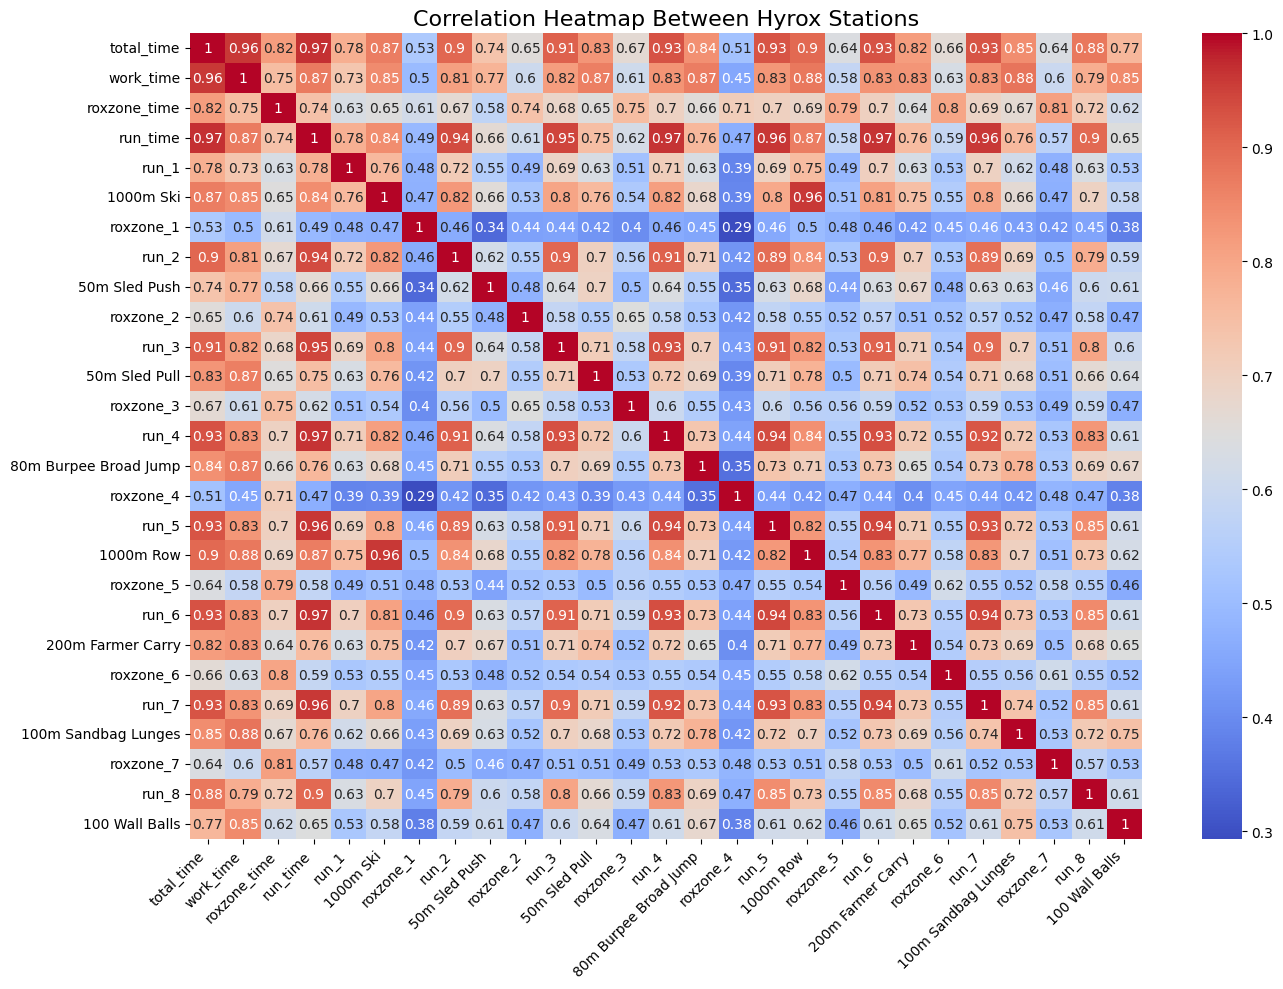

🏃 View run heatmap_chart at: http://127.0.0.1:8080/#/experiments/809278682180774593/runs/f4702033d2104822910c047086cc04b6
🧪 View experiment at: http://127.0.0.1:8080/#/experiments/809278682180774593


In [44]:
with mlflow.start_run(run_name="heatmap_chart"):

    plt.figure(figsize=(14, 10))
    sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
    plt.title("Correlation Heatmap Between Hyrox Stations", fontsize=16)
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)

    with tempfile.NamedTemporaryFile(suffix=".png", delete=False) as tmp:
        plt.savefig(tmp.name)
        tmp.close()
        mlflow.log_artifact(tmp.name, artifact_path="figures")
    
    plt.tight_layout()
    plt.show()
    plt.close()

mlflow.end_run()

In [45]:
correlation_with_total = correlation_matrix['total_time'].drop('total_time')
correlation_sorted = correlation_with_total.sort_values(ascending=False)

print("CORRELATION WITH TOTAL_TIME (desc):")
print("="*35)
print(correlation_sorted)

CORRELATION WITH TOTAL_TIME (desc):
run_time                 0.968417
work_time                0.961293
run_6                    0.930207
run_4                    0.929153
run_7                    0.926835
run_5                    0.926477
run_3                    0.910782
run_2                    0.902603
1000m Row                0.898144
run_8                    0.877244
1000m Ski                0.869286
100m Sandbag Lunges      0.845372
80m Burpee Broad Jump    0.839050
50m Sled Pull            0.828964
200m Farmer Carry        0.816070
roxzone_time             0.815493
run_1                    0.783233
100 Wall Balls           0.765623
50m Sled Push            0.737229
roxzone_3                0.665877
roxzone_6                0.660816
roxzone_2                0.654183
roxzone_5                0.638966
roxzone_7                0.638117
roxzone_1                0.534475
roxzone_4                0.514773
Name: total_time, dtype: float64


##### Scale Comparison

Let's see the time distribution (in mins), participants take to complete each station. This can reveal meaningful patterns between exercises.

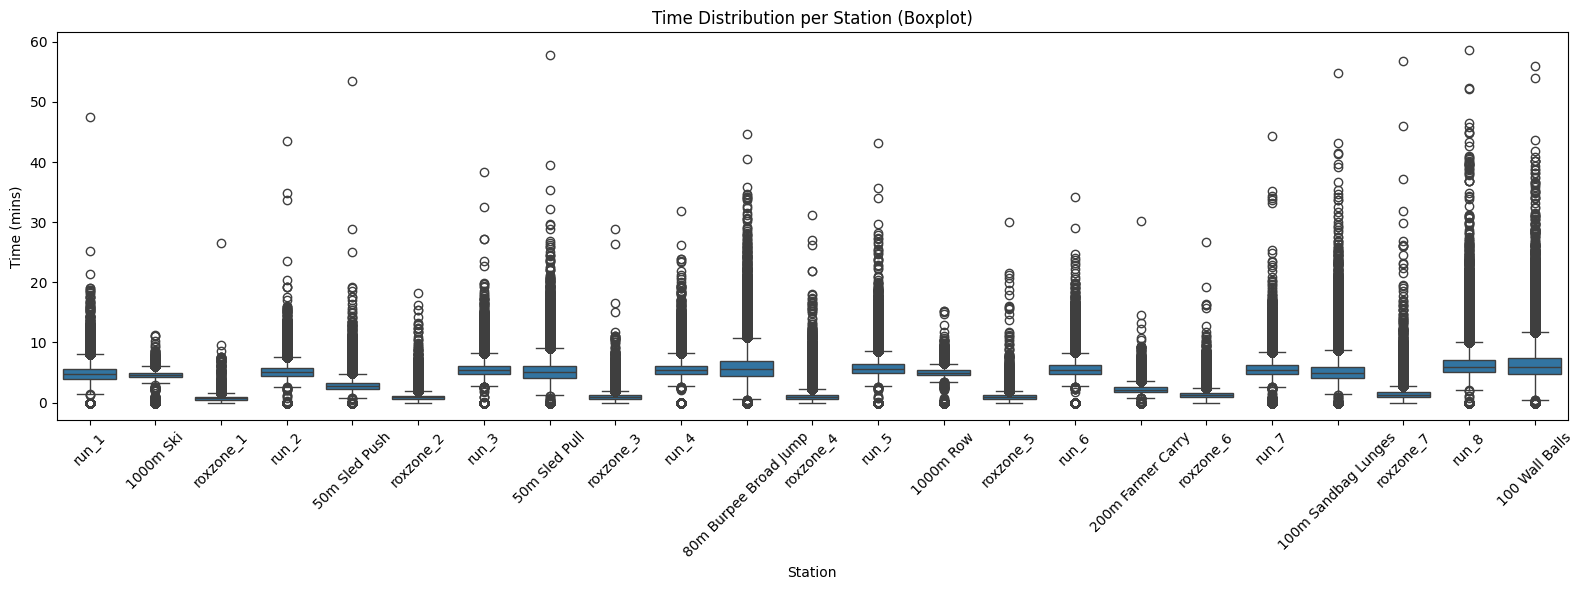

🏃 View run boxplot_chart at: http://127.0.0.1:8080/#/experiments/809278682180774593/runs/713826c43e534e698174bb79fc9a1d76
🧪 View experiment at: http://127.0.0.1:8080/#/experiments/809278682180774593


In [46]:
# remove aggregated columns from stations
station_segments = [col for col in stations if col not in ['total_time', 'work_time', 'roxzone_time', 'run_time']]

# melt the DataFrame to have a long format for stations
name = "Station"
name_value = "Time (mins)"
melted = clean_df[station_segments].melt(var_name=name, value_name=name_value)

with mlflow.start_run(run_name="boxplot_chart"):
    
    plt.figure(figsize=(16, 6))
    sns.boxplot(x=name, y=name_value, data=melted)
    plt.xticks(rotation=45)
    plt.title("Time Distribution per Station (Boxplot)")

    with tempfile.NamedTemporaryFile(suffix=".png", delete=False) as tmp:
        plt.savefig(tmp.name)
        tmp.close()
        mlflow.log_artifact(tmp.name, artifact_path="figures")

    plt.tight_layout()
    plt.show()
    plt.close()

mlflow.end_run()

### 4. Save Full Dataset

In [47]:
clean_df.head(1)

,user_id,event_id,event_name,id,name,gender,nationality,age_group,division,age_min,age_max,total_time,work_time,roxzone_time,run_time,run_1,1000m Ski,roxzone_1,run_2,50m Sled Push,roxzone_2,run_3,50m Sled Pull,roxzone_3,run_4,80m Burpee Broad Jump,roxzone_4,run_5,1000m Row,roxzone_5,run_6,200m Farmer Carry,roxzone_6,run_7,100m Sandbag Lunges,roxzone_7,run_8,100 Wall Balls,source_file
0,"111008_Diensthuber, Josef_GER",JGDMS4JI5C9,S6 2023 München,111008,"Diensthuber, Josef",0,GER,40-44,open,40.0,44.0,59.116667,25.516667,3.433333,30.166667,3.2,4.1,0.033333,3.6,2.116667,0.45,3.933333,3.333333,0.583333,3.85,3.3,0.65,3.8,4.216667,0.466667,3.833333,1.25,0.666667,3.783333,3.083333,0.583333,4.166667,4.116667,S6 2023 München.csv


In [48]:
clean_df.drop(columns=['event_id', 'id' , 'name', 'nationality', 'age_group', 'division', 'source_file'], inplace=True)
clean_df.rename(columns={'user_id': 'id'}, inplace=True)

In [49]:
clean_df.head(10)

,id,event_name,gender,age_min,age_max,total_time,work_time,roxzone_time,run_time,run_1,1000m Ski,roxzone_1,run_2,50m Sled Push,roxzone_2,run_3,50m Sled Pull,roxzone_3,run_4,80m Burpee Broad Jump,roxzone_4,run_5,1000m Row,roxzone_5,run_6,200m Farmer Carry,roxzone_6,run_7,100m Sandbag Lunges,roxzone_7,run_8,100 Wall Balls
0,"111008_Diensthuber, Josef_GER",S6 2023 München,0,40.0,44.0,59.116667,25.516667,3.433333,30.166667,3.200000,4.100000,0.033333,3.600000,2.116667,0.450000,3.933333,3.333333,0.583333,3.850000,3.300000,0.650000,3.800000,4.216667,0.466667,3.833333,1.250000,0.666667,3.783333,3.083333,0.583333,4.166667,4.116667
1,"112005_Groinig, Rene_AUT",S6 2023 München,0,25.0,29.0,59.450000,25.100000,2.950000,31.400000,3.250000,3.983333,0.033333,3.633333,2.216667,0.383333,3.900000,3.250000,0.516667,4.000000,2.650000,0.600000,4.033333,4.050000,0.316667,3.900000,1.350000,0.600000,3.983333,3.400000,0.500000,4.700000,4.200000
2,"123024_Stejskal, Tomáš_CZE",S6 2023 München,0,30.0,34.0,60.366667,26.066667,3.216667,31.083333,3.516667,4.233333,0.050000,3.800000,1.866667,0.400000,3.883333,3.250000,0.533333,3.866667,3.000000,0.666667,3.883333,4.316667,0.333333,3.883333,1.516667,0.650000,3.916667,3.266667,0.583333,4.333333,4.616667
3,"115015_Oldach, Maik_GER",S6 2023 München,0,30.0,34.0,63.216667,27.483333,3.233333,32.500000,3.466667,4.083333,0.016667,3.866667,2.366667,0.433333,4.050000,3.150000,0.533333,4.066667,3.783333,0.600000,4.100000,4.166667,0.383333,4.116667,1.700000,0.716667,4.183333,3.616667,0.550000,4.650000,4.616667
4,"104030_Scheffel, Steve_GER",S6 2023 München,0,30.0,34.0,64.000000,29.016667,3.366667,31.616667,3.366667,4.216667,0.033333,3.783333,2.700000,0.416667,4.133333,3.533333,0.600000,3.966667,2.500000,0.650000,4.066667,4.583333,0.383333,3.950000,2.000000,0.750000,3.950000,3.900000,0.533333,4.400000,5.583333
5,"93021_Guillaume, Siber_FRA",S6 2023 München,0,30.0,34.0,65.816667,28.733333,3.366667,33.716667,3.516667,4.083333,0.033333,4.000000,1.983333,0.450000,4.266667,4.050000,0.516667,4.283333,2.616667,0.666667,4.383333,4.266667,0.350000,4.400000,2.066667,0.683333,4.233333,3.800000,0.666667,4.633333,5.866667
6,"95005_Schwengers, Patrick_GER",S6 2023 München,0,25.0,29.0,66.233333,27.150000,5.016667,34.066667,3.233333,3.850000,0.033333,3.966667,2.550000,0.666667,4.400000,3.600000,0.700000,4.416667,4.083333,0.883333,4.466667,4.316667,0.566667,4.516667,1.600000,1.400000,4.350000,3.066667,0.766667,4.716667,4.083333
7,"93001_Bartsch, Michael_GER",S6 2023 München,0,25.0,29.0,66.883333,30.366667,3.700000,32.816667,3.533333,4.483333,0.033333,3.966667,3.350000,0.700000,4.183333,3.516667,0.566667,4.150000,3.200000,0.650000,4.216667,4.633333,0.350000,4.183333,1.666667,0.750000,4.233333,4.433333,0.650000,4.350000,5.083333
8,"115023_Pötzelsber, Laurenz_AUT",S6 2023 München,0,35.0,39.0,66.950000,27.583333,4.733333,34.633333,3.516667,4.166667,0.033333,4.150000,2.350000,0.683333,4.316667,3.516667,0.783333,4.400000,3.350000,1.000000,4.383333,4.366667,0.516667,4.433333,1.900000,0.883333,4.316667,3.283333,0.833333,5.116667,4.650000
9,"115007_Müller, Reto_SUI",S6 2023 München,0,35.0,39.0,67.883333,30.116667,3.283333,34.483333,3.950000,4.500000,0.033333,4.400000,3.533333,0.450000,4.250000,4.016667,0.550000,4.266667,2.983333,0.550000,4.266667,4.433333,0.416667,4.350000,1.800000,0.683333,4.383333,4.033333,0.600000,4.616667,4.816667


In [51]:
data_processed_folder = '../data/processed'
os.makedirs(data_processed_folder, exist_ok=True)

filename = 'hyrox_full_data.csv'
file_path = os.path.join(data_processed_folder, filename)
clean_df.to_csv(file_path, index=False)

with mlflow.start_run(run_name="hyrox_full_data"):
    mlflow.log_artifact(file_path)
mlflow.end_run()

🏃 View run hyrox_full_data at: http://127.0.0.1:8080/#/experiments/809278682180774593/runs/d6e1ade72cd347f7813ac76663cae477
🧪 View experiment at: http://127.0.0.1:8080/#/experiments/809278682180774593
